In [2]:
%matplotlib notebook

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fmin
sns.set()

In [6]:
df = pd.read_csv("1880_2020.csv", header=4)

In [9]:
date = np.zeros(len(df.Year))
for i in range(0,len(df.Year)):
    df.loc[i,"Year"] = (float(str(df.Year[i])[0:4])+(float(str(df.Year[i])[4:6])-1)/12)

In [10]:
df

,Year,Value
0,1880.000000,-0.05
1,1880.083333,-0.14
2,1880.166667,-0.09
3,1880.250000,-0.05
4,1880.333333,-0.09
...,...,...
1681,2020.083333,1.17
1682,2020.166667,1.19
1683,2020.250000,1.06
1684,2020.333333,0.95


<IPython.core.display.Javascript object>


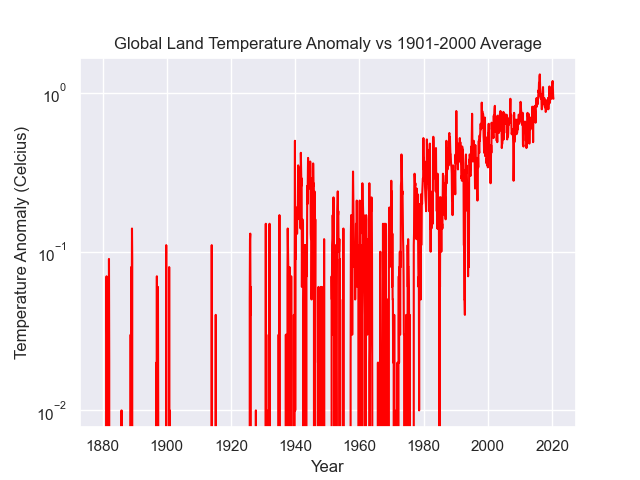

In [12]:
# generate the plot
fig = plt.figure()
ax = fig.gca()
plt.plot( df.Year
        , df.Value
        , c = "red"
        )
ax.set_xlabel("Year")
ax.set_ylabel("Temperature Anomaly (Celcius)")
ax.set_yscale("log")
plt.title("Global Land Temperature Anomaly vs 1901-2000 Average")
plt.savefig("GlobalLandSeaTemperatureAnomaly.png")
plt.show()

In [ ]:
class Anomaly():
    def __init__(self, dates, anomalies, fitType = "exponential", initparams = None):
        self.dates = np.double(dates)
        self.anomalies = np.double(anomalies)
        self.fitType = fitType
        self.initparams = initparams
        if self.fitType == "exponential" and self.initparams is None:
        self.initparams = [-1, 2, 1]
    def predictExponential(self, params, dates):
        #f = c + e^(kx)
        #first element of params is c
        #second element of params is k (number adjusting x)
        return params[0] + np.exp( params[1] * dates)
        def getSumDistSq(self, params):
        return np.sum( (self.anomalies - self.predictExponential(params, self.dates) )**2 )